In [1]:
from os.path import join

import numpy as np
from numpy.linalg import svd

from matplotlib.image import imread
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

In [2]:
# Read imagea and convert RGB to grayscale
X = imread(join('..', 'DATA', 'dog.jpg')).mean(axis=2)

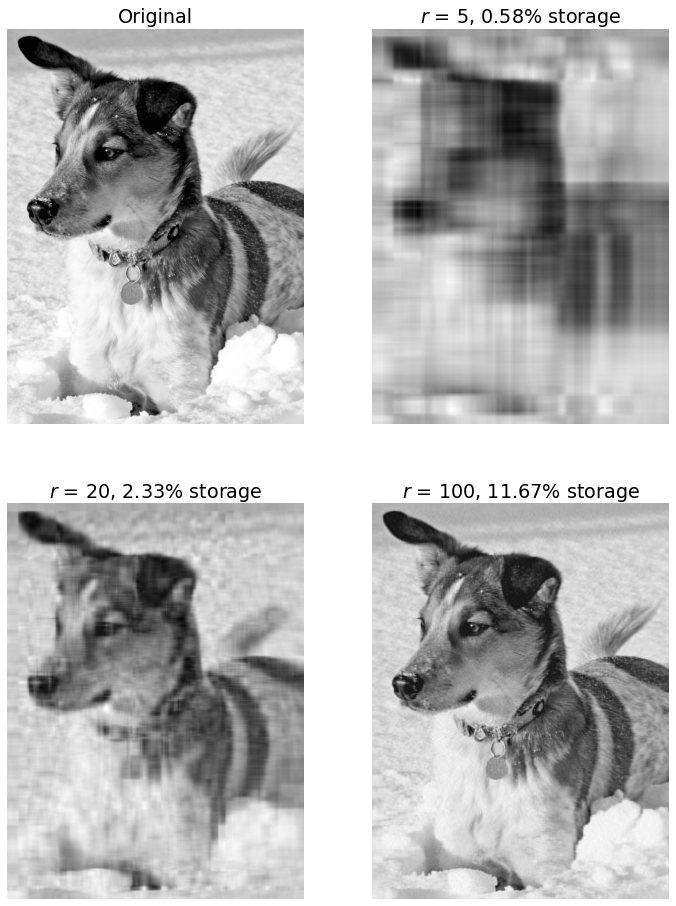

In [3]:
# Figure 1.3

U, S, VT = svd(X, full_matrices=False)
Σ = np.diag(S)

_, axs = plt.subplots(2, 2, figsize=(12, 16))
axs = axs.flat

axs[0].imshow(X, cmap='gray')
axs[0].axis(False)
axs[0].set_title('Original')

for ax, r in zip(axs[1:], [5, 20, 100]):
    # Construct approximate image
    X_approx = U[:, :r] @ Σ[:r, :r] @ VT[:r, :]
    storage = (U[:, :r].nbytes + S[:r].nbytes + VT[:r, :].nbytes) / X.nbytes

    ax.imshow(X_approx, cmap='gray')
    ax.axis(False)
    ax.set_title(f'$r$ = {r}, {100 * storage:0.2f}% storage')

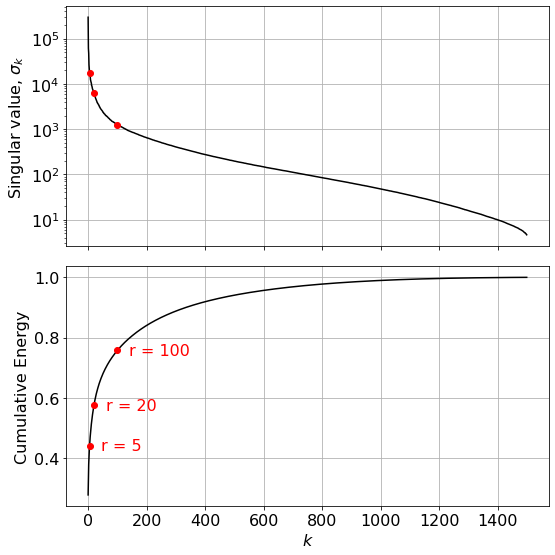

In [4]:
# Figure 1.4
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

axs[0].semilogy(S, color='black')
axs[0].grid(True)
axs[0].plot([5, 20, 100], [S[5], S[20], S[100]], 'o', color='red')
axs[0].set_ylabel(r'Singular value, $\sigma_k$')

cum_s = np.cumsum(S) / S.sum()
axs[1].plot(cum_s, color='black')
axs[1].grid(True)

rs = [5, 20, 100]
ys = [cum_s[r] for r in rs]
axs[1].plot(rs, ys, 'o', color='red')
for r, y in zip(rs, ys):
    axs[1].text(r + 40, y, f'r = {r}', verticalalignment='center', color='red')

axs[1].set_ylabel(r'Cumulative Energy')
axs[1].set_xlabel('$k$')

plt.tight_layout()

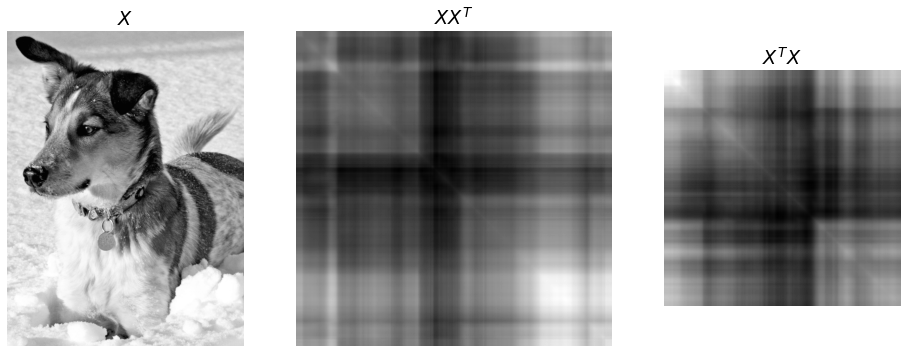

In [5]:
# Figure 1.5
XXT = X @ X.T
XTX = X.T @ X

image_widths = [X.shape[1], XXT.shape[1], XTX.shape[1]]
fig, axs = plt.subplots(
    1, 3,
    figsize=(16, 10),
    gridspec_kw={'width_ratios': image_widths}
)

axs[0].imshow(X, cmap='gray')
axs[0].axis(False)
axs[0].set_title(r'$X$')

axs[1].imshow(XXT, cmap='gray')
axs[1].axis(False)
axs[1].set_title(r'$XX^T$')

axs[2].imshow(XTX, cmap='gray')
axs[2].axis(False)
axs[2].set_title(r'$X^TX$');